In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
from pandas.io.json import json_normalize

In [4]:

#It needs to wrangling data in this table because there is not any column, only a big list where the first list is the name of each sublist with each one values. It needs 6 columns with those names.


def readcsv(ruta):
      df = pd.read_csv(ruta, sep = "\t")
      return df
table = readcsv(ruta="/Users/ariadnapuigventos/Documents/CURSOS/BRIDGE/DS_Ejercicios_Python/BootCamp_TheBridge/Proyecto_Navidad_Ariadna/documentation/world_marathon_majors.csv")
table

,year;winner;gender;country;time;marathon
0,2014;Dennis Kimetto;Male;Kenya;02:02:57;Berlin
1,2011;Geoffrey Mutai;Male;Kenya;02:03:02;Boston
2,2016;Kenenisa Bekele;Male;Ethiopia;02:03:03;Be...
3,2016;Eliud Kipchoge;Male;Kenya;02:03:05;London
4,2013;Wilson Kipsang;Male;Kenya;02:03:23;Berlin
...,...
531,1966;Bobbi Gibb;Female;United States;03:21:40;...
532,1974;Jutta von Haase;Female;Germany;03:22:01;B...
533,1969;Sara Mae Berman;Female;United States;03:2...
534,1967;Bobbi Gibb;Female;United States;03:27:17;...


In [5]:
majors = pd.read_csv("/Users/ariadnapuigventos/Documents/CURSOS/BRIDGE/DS_Ejercicios_Python/BootCamp_TheBridge/Proyecto_Navidad_Ariadna/documentation/world_marathon_majors.csv", sep = ";")
majors

,year,winner,gender,country,time,marathon
0,2014,Dennis Kimetto,Male,Kenya,02:02:57,Berlin
1,2011,Geoffrey Mutai,Male,Kenya,02:03:02,Boston
2,2016,Kenenisa Bekele,Male,Ethiopia,02:03:03,Berlin
3,2016,Eliud Kipchoge,Male,Kenya,02:03:05,London
4,2013,Wilson Kipsang,Male,Kenya,02:03:23,Berlin
...,...,...,...,...,...,...
531,1966,Bobbi Gibb,Female,United States,03:21:40,Boston
532,1974,Jutta von Haase,Female,Germany,03:22:01,Berlin
533,1969,Sara Mae Berman,Female,United States,03:22:46,Boston
534,1967,Bobbi Gibb,Female,United States,03:27:17,Boston


In [6]:
majors.sort_values("time", ascending=True).head(30)

,year,winner,gender,country,time,marathon
0,2014,Dennis Kimetto,Male,Kenya,02:02:57,Berlin
1,2011,Geoffrey Mutai,Male,Kenya,02:03:02,Boston
2,2016,Kenenisa Bekele,Male,Ethiopia,02:03:03,Berlin
3,2016,Eliud Kipchoge,Male,Kenya,02:03:05,London
4,2013,Wilson Kipsang,Male,Kenya,02:03:23,Berlin
5,2017,Eliud Kipchoge,Male,Kenya,02:03:32,Berlin
6,2011,Patrick Musyoki,Male,Kenya,02:03:38,Berlin
7,2013,Dennis Kimetto,Male,Kenya,02:03:45,Chicago
8,2017,Wilson Kipsang,Male,Kenya,02:03:58,Tokyo
9,2008,Haile Gebrselassie,Male,Ethiopia,02:03:59,Berlin


In [7]:
time_column = pd.to_timedelta(majors["time"].str.strip())
print(time_column)

0     0 days 02:02:57
1     0 days 02:03:02
2     0 days 02:03:03
3     0 days 02:03:05
4     0 days 02:03:23
            ...      
531   0 days 03:21:40
532   0 days 03:22:01
533   0 days 03:22:46
534   0 days 03:27:17
535   0 days 03:30:00
Name: time, Length: 536, dtype: timedelta64[ns]


In [8]:
#I want to do a sum() then I need to get time_column.
time_column.sum()

Timedelta('52 days 16:01:43')

In [9]:
majors["time"].head(3) #I CAN'T USE IT WITH THIS VARIABLE!!

0    02:02:57
1    02:03:02
2    02:03:03
Name: time, dtype: object

In [10]:
time_column.head(3) #It's the same!!

0   0 days 02:02:57
1   0 days 02:03:02
2   0 days 02:03:03
Name: time, dtype: timedelta64[ns]

In [41]:
time_column.astype('timedelta64[s]')

0       7377.0
1       7382.0
2       7383.0
3       7385.0
4       7403.0
        ...   
531    12100.0
532    12121.0
533    12166.0
534    12437.0
535    12600.0
Name: time, Length: 536, dtype: float64

In [27]:
majors.value_counts().sort_values(ascending=False)

year  winner               gender  country        time      marathon
1897  John J. McDermott    Male    United States  02:55:10  Boston      1
1910  Fred Cameron         Male    Canada         02:28:52  Boston      1
1929  Johnny Miles         Male    Canada         02:33:08  Boston      1
1928  Clarence DeMar       Male    United States  02:37:07  Boston      1
1898  Ronald J. MacDonald  Male    Canada         02:42:00  Boston      1
                                                                       ..
2017  Tirunesh Dibaba      Female  Ethiopia       02:18:31  Chicago     1
      Wilson Kipsang       Male    Kenya          02:03:58  Tokyo       1
2018  Birhane Dibaba       Female  Ethiopia       02:19:51  Tokyo       1
      Desi Linden          Female  United States  02:39:54  Boston      1
      Yuki Kawauchi        Male    Japan          02:15:58  Boston      1
Length: 536, dtype: int64

In [47]:
#It's show the most repeater how many marathon they won
repetidores = majors.winner.value_counts().head(15)
repetidores

Grete Waitz           11
Bill Rodgers           8
Ingrid Kristiansen     8
Paula Radcliffe        7
Clarence DeMar         7
Uta Pippig             7
Mary Keitany           6
Catherine Ndereba      6
Eliud Kipchoge         6
Rosa Mota              6
Martin Lel             5
Khalid Khannouchi      5
Wilson Kipsang         5
Joyce Chepchumba       5
Steve Jones            4
Name: winner, dtype: int64

In [48]:
nacionalidad = majors.country.value_counts().head(15)
nacionalidad

Kenya             136
United States     104
Ethiopia           51
Germany            36
United Kingdom     35
Japan              22
Norway             20
Canada             17
Portugal           11
Mexico             10
Finland            10
Poland              8
Russia              8
Brazil              7
Italy               6
Name: country, dtype: int64

In [37]:
repetidores = majors.winner.value_counts()
majors[majors.winner.isin(repetidores.index[repetidores.gt(5)])]

,year,winner,gender,country,time,marathon
3,2016,Eliud Kipchoge,Male,Kenya,02:03:05,London
5,2017,Eliud Kipchoge,Male,Kenya,02:03:32,Berlin
10,2015,Eliud Kipchoge,Male,Kenya,02:04:00,Berlin
11,2014,Eliud Kipchoge,Male,Kenya,02:04:11,Chicago
13,2018,Eliud Kipchoge,Male,Kenya,02:04:17,London
...,...,...,...,...,...,...
451,1983,Rosa Mota,Female,Portugal,02:31:12,Chicago
463,1978,Grete Waitz,Female,Norway,02:32:30,NYC
479,1930,Clarence DeMar,Male,United States,02:34:48,Boston
485,1928,Clarence DeMar,Male,United States,02:37:07,Boston


In [54]:
majors.groupby(["gender"]).sum()

,year
gender,
True,1065525


In [53]:
Q1 = time_column.astype('timedelta64[s]').quantile(0.25)
print(Q1)
Q3 = time_column.astype('timedelta64[s]').quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)
print("Two extrems: the first one with 2:02:57 by Kenian Athlete in Berlin Marathon in 2014; and the last one with 3:30:00 by United States Athlete in Boston Marathon in 1968.)

7783.0
8856.25
1073.25


In [43]:
time_column = pd.to_timedelta(majors["time"].str.strip())
print(time_column)

0     0 days 02:02:57
1     0 days 02:03:02
2     0 days 02:03:03
3     0 days 02:03:05
4     0 days 02:03:23
            ...      
531   0 days 03:21:40
532   0 days 03:22:01
533   0 days 03:22:46
534   0 days 03:27:17
535   0 days 03:30:00
Name: time, Length: 536, dtype: timedelta64[ns]


array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

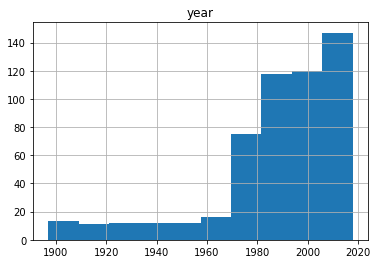

In [17]:
majors.hist()

In [20]:
majors.country = majors.country.astype('category')
majors.country

0              Kenya
1              Kenya
2           Ethiopia
3              Kenya
4              Kenya
           ...      
531    United States
532          Germany
533    United States
534    United States
535    United States
Name: country, Length: 536, dtype: category
Categories (37, object): ['Australia', 'Belgium', 'Brazil', 'Canada', ..., 'Tanzania', 'United Kingdom', 'United States', 'Yugoslavia']

<AxesSubplot:>

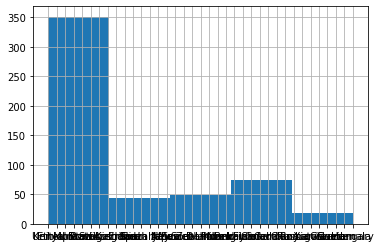

In [31]:
majors.country.hist(bins=5)

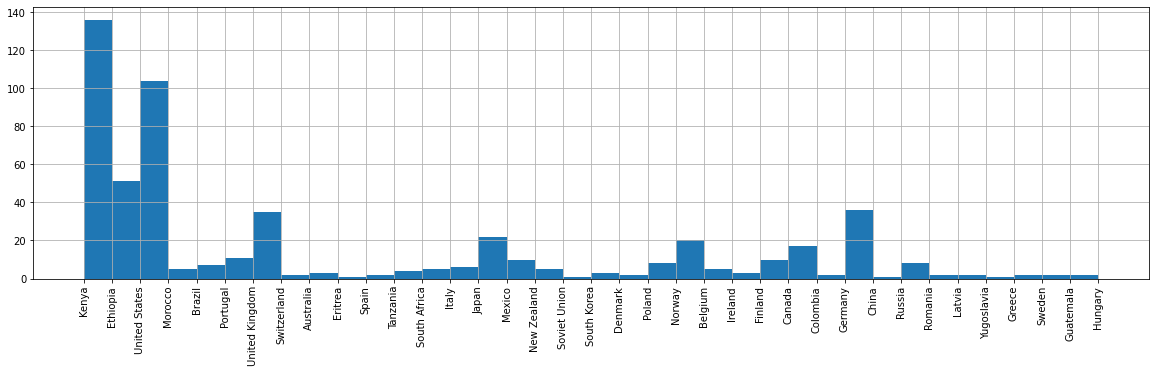

In [43]:
graphic = majors["country"].hist(bins=36, figsize=(20, 5))
plt.xticks(rotation='vertical')
plt.show()